## Week 1 HW

In [1]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns

**1) Part 1의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**

In [2]:
def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

thetas = np.linspace(0, 1, 300)

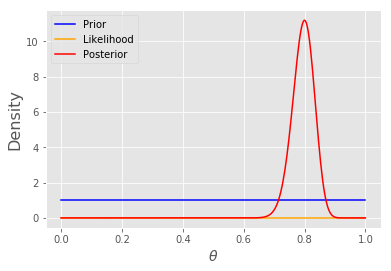

In [3]:
# Strong likelihood X Uninformative prior
# Likelihood parameters
n = 100
y = 75

# Prior parameters
a0 = 1
b0 = 1

prior = st.beta.pdf(thetas, a0, b0)
posterior = st.beta.pdf(thetas, a0+n, b0+(n-y))

plt.plot(thetas, prior, label='Prior', c='blue')
plt.plot(thetas, likelihood(thetas, n, y), label='Likelihood', c='orange')
plt.plot(thetas, posterior, label='Posterior', c='red')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

slup = plt.gcf()

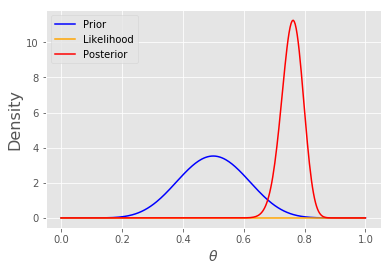

In [4]:
# Strong likelihood X Weak prior
# Likelihood parameters
n = 100
y = 75

# Prior parameters
a0 = 10
b0 = 10

prior = st.beta.pdf(thetas, a0, b0)
posterior = st.beta.pdf(thetas, a0+n, b0+(n-y))

plt.plot(thetas, prior, label='Prior', c='blue')
plt.plot(thetas, likelihood(thetas, n, y), label='Likelihood', c='orange')
plt.plot(thetas, posterior, label='Posterior', c='red')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

slwp = plt.gcf()

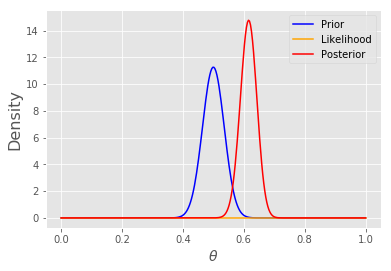

In [5]:
# Strong likelihood X Strong prior
# Likelihood parameters
n = 100
y = 75

# Prior parameters
a0 = 100
b0 = 100

prior = st.beta.pdf(thetas, a0, b0)
posterior = st.beta.pdf(thetas, a0+n, b0+(n-y))

plt.plot(thetas, prior, label='Prior', c='blue')
plt.plot(thetas, likelihood(thetas, n, y), label='Likelihood', c='orange')
plt.plot(thetas, posterior, label='Posterior', c='red')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

slsp = plt.gcf()

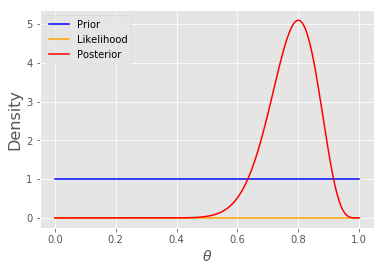

In [6]:
# Weak likelihood X Uninformative prior
# Likelihood parameters
n = 20
y = 15

# Prior parameters
a0 = 1
b0 = 1

prior = st.beta.pdf(thetas, a0, b0)
posterior = st.beta.pdf(thetas, a0+n, b0+(n-y))

plt.plot(thetas, prior, label='Prior', c='blue')
plt.plot(thetas, likelihood(thetas, n, y), label='Likelihood', c='orange') 
plt.plot(thetas, posterior, label='Posterior', c='red')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

wlup = plt.gcf()

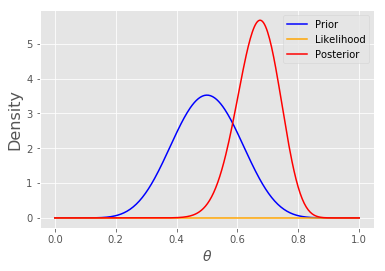

In [7]:
# Weak likelihood X Weak prior
# Likelihood parameters
n = 20
y = 15

# Prior parameters
a0 = 10
b0 = 10

prior = st.beta.pdf(thetas, a0, b0)
posterior = st.beta.pdf(thetas, a0+n, b0+(n-y))

plt.plot(thetas, prior, label='Prior', c='blue')
plt.plot(thetas, likelihood(thetas, n, y), label='Likelihood', c='orange')
plt.plot(thetas, posterior, label='Posterior', c='red')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

wlwp = plt.gcf()

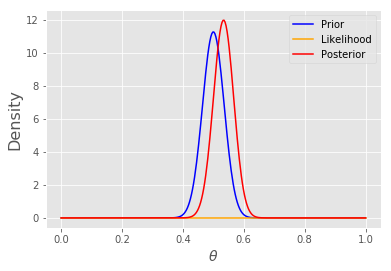

In [8]:
# Weak likelihood X Strong prior
# Likelihood parameters
n = 20
y = 15

# Prior parameters
a0 = 100
b0 = 100

prior = st.beta.pdf(thetas, a0, b0)
posterior = st.beta.pdf(thetas, a0+n, b0+(n-y))

plt.plot(thetas, prior, label='Prior', c='blue')
plt.plot(thetas, likelihood(thetas, n, y), label='Likelihood', c='orange')
plt.plot(thetas, posterior, label='Posterior', c='red')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

wlsp = plt.gcf()

**2) BDA 1.3 Exercise**
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x or X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$. Each parent transmits one of its own genes to the child; if a parent is a heterozygote, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild has blue eyes.

**sol**

2-a) Show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$.

**P(Child is a heterozygote | Parents are brown-eyed & child is brown-eyed)**

= $\frac{4p^2(1-p)^2\times\frac{1}{2}+2p(1-p)^3\times2\times\frac{1}{2}}{4p^2(1-p)^2\times\frac{3}{4}+2p(1-p)^3\times2\times1+(1-p)^4\times1}$

= $\frac{2p^2+2p(1-p)}{3p^2+4p(1-p)+(1-p)^2}$

= $\frac{1}{2p+1}$

2-b) Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild has blue eyes.

**P(Judy is heterozygote | Parents are brown-eyed & Judy is brown-eyed & n children are all brown-eyed)**

= $\frac{4p^2(1-p)^2\times\frac{1}{2}\times(\frac{3}{4})^n+2p(1-p)^3\times2\times\frac{1}{2}\times(\frac{3}{4})^n}{4p^2(1-p)^2\times\frac{1}{2}\times(\frac{3}{4})^n+4p^2(1-p)^2\times\frac{1}{4}+2p(1-p)^3\times2\times\frac{1}{2}\times(\frac{3}{4})^n+2p(1-p)^3\times2\times\frac{1}{2}+(1-p)^4\times1}$

= $\frac{2p\times(\frac{3}{4})^n}{2p\times(\frac{3}{4})^n+1}$

P(Judy's first grandchild has blue eyes

= P(Judy's child is heterozygote) X P(Heterozygote parent has blue-eyed child)

= $\frac{1}{4}p(p+1)(1-p)^2(p+\frac{1}{2})$


**P(Judy's first grandchild has blue eyes | Parents are brown-eyed & Judy is brown-eyed & n children are all brown-eyed)**

= $\frac{\frac{1}{4}p(p+1)(1-p)^2(p+\frac{1}{2})}{4p^2(1-p)^2\times\frac{1}{2}\times(\frac{3}{4})^n+4p^2(1-p)^2\times\frac{1}{4}+2p(1-p)^3\times2\times\frac{1}{2}\times(\frac{3}{4})^n+2p(1-p)^3\times2\times\frac{1}{2}+(1-p)^4\times1}$

= $\frac{1}{4}$$\frac{p(p+1)(p+\frac{1}{2})}{2p\times(\frac{3}{4})^n+1}$

**3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.**

3-a) $\textbf{Beta}$ distribution으로 위의 $\textbf{belief}$을 survival rate에 관한 $\textbf{prior distribution}$으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가? 
(Hint : 여러분의 믿음의 강도 따라 $\alpha, \beta$의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)


**sol**

$\theta \sim Beta(\alpha, \beta)$

$E[\theta]=\frac{\alpha}{\alpha + \beta}=0.9$, $\alpha = 9\beta$

생존율이 [0.8, 0.97] 구간에 있다고 믿는 확률을 95%라고 가정

=> $P(0.8\leq\theta\leq0.97)=0.95$

In [9]:
# 𝛼 = 9k, 𝛽 = k일 때 𝑃(0.8≤𝜃≤0.97)

for k in range(1, 10):
    print("alpha = "+str(9*k)+", beta = "+str(k)+": "+str(st.beta.cdf(0.97, 9*k, k) - st.beta.cdf(0.8, 9*k, k)))

alpha = 9, beta = 1: 0.626013330654565
alpha = 18, beta = 2: 0.8071787111726657
alpha = 27, beta = 3: 0.892715183397574
alpha = 36, beta = 4: 0.9378685312699843
alpha = 45, beta = 5: 0.9630476420328056
alpha = 54, beta = 6: 0.9775813072560174
alpha = 63, beta = 7: 0.9861808694298634
alpha = 72, beta = 8: 0.991368387370736
alpha = 81, beta = 9: 0.9945475074357272


0.95를 넘기는 지점인 $\alpha=45$, $\beta=5$ 정도가 적당하겠다.

$\therefore\theta \sim Beta(45, 5)$

3-b) 이제 $\textbf{data gathering}$. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 $\textbf{Posterior Distribution}$ 구하기.

**sol**

$\theta|X \sim Beta(\alpha+n, \beta+(n-y))$

$n = 10$, $y = 10$

$\therefore\theta|X \sim Beta(55, 5)$

3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive)

$P(x_{new, post}|data) = \int_{\theta}P(x_{new}|\theta)P(\theta|data)d\theta$

i) $P($다음 환자 생존$|data) = \int_{0}^{1}\theta P(\theta|data)d\theta = E[\theta|data]$

In [10]:
55/60

0.9166666666666666

In [11]:
st.beta(55, 5).mean()

0.9166666666666666

ii) $P($20명 중 2명 이상 사망$|data)$

$=1-P($20명 중 20명 생존$|data)-P($20명 중 19명 생존$|data)$

$=1-\int_{0}^{1}\theta^{20}P(\theta|data)d\theta-\int_{0}^{1}20\times\theta^{19}(1-\theta)P(\theta|data)d\theta$

$=1-\frac{1!0!}{2!}E[\theta|data]-20\times\frac{19!1!}{21!}E[\theta|data]$

$=1-\frac{1}{2}E[\theta|data]-\frac{1}{21}E[\theta|data]$

In [12]:
1-1/2*st.beta(55, 5).mean()-1/21*st.beta(55, 5).mean()

0.4980158730158731